### Reading

1. Bishop. Pattern recognition and machine learning. 14.4   
1. Flatch. Machine learning..., 5.*  
1. Hastie. Elements of statistical leanring, 9.2.*   
1. Flatch, Machine Learning, 11.*
1. Kuhn, Applied Predictive Modeling, 8.*


## Outline

1. Decision trees
1. Splitting criteria
1. Complexity
1. Bagging. Random Forest
1. Boosting. AdaBoost
1. Gradient Boosting
1. Optimizations for Gradient Boosting
1. Stacking. Validation for stacking.

# 1 Decision trees

<img src="images/tree.png" style="height:600px">

## 1.1 Compared to linear models

About **linear models** so far,  
Pros:  
1. fast training
2. simple regularization

Cons:
1. Hard to deal with non-linear function dependences. Need of feature engineering and heruistics
2. Scale sensitive
3. Need of one-hot encoding of categorial features


**Decision trees**,  
Pros:  
1. Can approximate non-linear functions of any kind
2. Easy interpretable
3. Scale insensitive
4. missing values
5. can process categorial features 

Cons:
1. Subject to severe overfitting
2. unstable - small variations in data produce different trees
3. learning an optimal decision tree is NP-hard. All algorithms are greedy. 
4. Not efficient in high dimensions. Number of samples required to populate the tree doubles for each additional level the tree grows to.


## 1.2 Defenitions
Splitting criteria on vertex v:  
$\beta_v(x; j, t) = [x_j < t]$ 


**Greedy algorithm to build decision tree**
<pre>
Given a vertex $v$,  
for every feature $f$:  
    for every threshold $t$ on f:  
        estimate chosen splitting criterion  
        
Select $t$ and $f$ that maximizes that criterion.  
</pre>


! easy to show that we can build decision tree with zero training error  

Objective function on every splitting:  
$Q(R_m, j, s) = H(R_m) - \frac{|R_l|)}{|R_m|}H(R_l) - \frac{|R_r|)}{|R_m|}H(R_r)$  

$Q(R_m, j, s) \rightarrow max$

where H(R) - impurity criterion  
$H(R) = min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} L(y_i, c)$  
$H(R) \rightarrow min$

where L(y_i, c) - loss function

# 2 Splitting Criteria
**MSE regression**  
$H(R) = min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$

We now that for MSE task optimal value of c is  
$c_{*} = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$  

$H(R) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c_{*})^2 = D[y_i]$

**MAE regression**

$c_{*} = median\{y_i\}$


**Classification criterion**

$p_k = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} [y_i == k]$

$k_* = arg max_k p_k$

**Classification error**

$H(R) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} [y_i \neq k_*] = 1 - p_{k_*}$


**Ginni criterion**

$H(R) = \sum_{k=1}^K p_k (1 - p_k)$


**Entropy criterion**

$H(R) =  - \sum_{k=1}^K p_k log p_k $

<img src="images/gini.png" style="height:300px">

### Stopping criterion

1. max tree depth  
2. max number of objects in the leaf   
3. max number of leaves  
4. $Q^{(k+1)} - Q^{(k)} > threshold $  
5. all objects in leaves have same class

Stopping creterion controls the complexity of the tree.  


### Popular algorithms

1. ID3   
    + entropy criterion  
    + 4th and 5th stopping criteria  
2. C4.5  
    + 2nd stopping criterion  
    + modified entropy criterion  
3. CART  
    + ginni criterion
    
    
### Connection with linear models

$a(x) = \sum_{j=1}^n w_j [x \in J_j]$  
where $J_j$ are leaves.


# 3 Complexity of training decision tree

n - number of samples
d - number of features
t - number of trees

$O(log d)$ complexity of predicting a class label

$O(n*d*logd)$ complexity of traing a tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets


data = datasets.load_wine()

df = pd.DataFrame(data['data'], columns = data.feature_names)
y = np.array(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
model = DecisionTreeClassifier()
model.fit(df, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

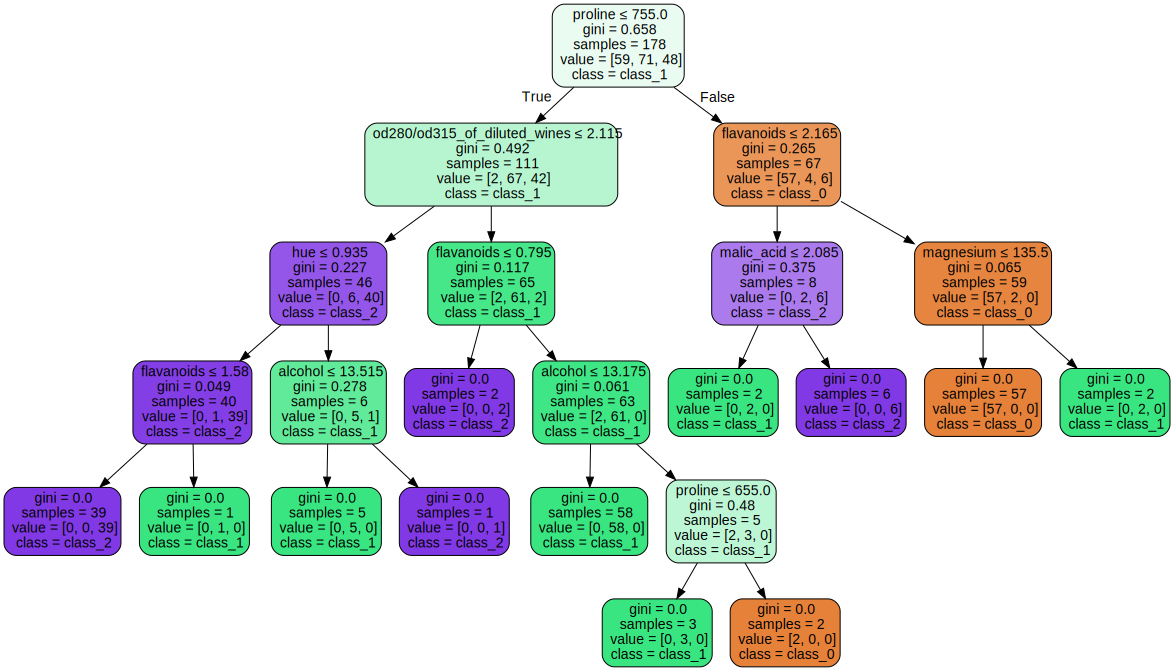

In [4]:
import graphviz 


dot_data = export_graphviz(model, out_file=None, 
                         feature_names=data.feature_names,  
                         class_names=data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

##  4 Bagging (bootstrap aggregation). Random Forest

1. Bootstrap  
 + averaging over predictions of N base models on subsets from dataset with repetitions
 + which gives 1/N factor in dispersion
 + assumption that models are not correlated
 
 
**Random Forest**  
1. Train N non-correlated decision trees in parallel
1. Average their predictions
 
 
Random forest is a bagging of decision trees  
 + subsampling over features
 
 
 
### Out-of-bag score

every decision tree in the forest is trained on bootstrapped subset, so objects not included in train subset can be considered as control set

$OOB = \sum_{i=1}^ L(y_i, \frac{1}{\sum_{n=1}^N [x_i \notin X_n]} \sum_{n=1}^N [x_i \notin X_n] b_n(x_i)) $

L - loss function


### Complexity

n - number of samples
m - number of trees

$O(m * n * log(n))$ - memory size of trained model 

In [5]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=10, random_state=1337, oob_score=True)
model.fit(df, y)
model.oob_score_

/opt/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9606741573033708

In [6]:
model.feature_importances_

array([ 0.09838885,  0.01680485,  0.00127441,  0.00933723,  0.02936158,
        0.0628973 ,  0.18961217,  0.00612884,  0.02929391,  0.1252294 ,
        0.05507188,  0.09839906,  0.27820052])

# 5 Boosting. Adaboost

**Adaboost**  
Iteratively build decision trees, trying to predict the errors of the last tree.


Given finite set $\{ (x_i, y_i)\}_{i=1}^N$, where $y \in \{ -1, 1 \}$  
and loss function $L(y, \hat y) = e^{-y \hat y}$  


1. init sample weights $w_1 = \frac 1 N$
2. For t  in 1..T  
2.1  $\epsilon_t = \sum_{h_t(x_i) \neq y_i} w_{t,i}$  
2.2  $h_t(x) = \arg \min_{h} \epsilon_t$  
2.3  $\alpha_t = \frac 1 2 \ln \frac {1 - \epsilon_t} {\epsilon_t}$  
2.4  $F_t(x) = F_{t-1}(x) + \alpha_t h_t(x)$   
2.5  $w_{t,i} = w_{t-1,i} e^{-y_i \alpha_t h_t(x_i)}$  
2.6  normalize $w_t$, so $\sum_i w_{t,i} = 1$  

# 6 Gradient Boosting

Iteratively build decision trees, trying to predict the gradient of error of the last tree.

Given finite set  {(xi,yi)}Ni=1,
and some differentiable loss function  L(y,ŷ ).  

1. select $h_0$ = const = \arg \min_{c = const} L(y, c)  
2. for t in 1..T  
2.1 pseudo-residuals   $r_{t,i} = - \frac {d L(y, F_{t-1}(x_i))} {d y_i}$    
2.2 train $h_t$ to the dataset $\{ (x_i, r_{t,i} )\}_{i=1}^N$  
2.3 $alpha_t = \arg \min_{\alpha} \sum_i L(y_i, F_{t-1}(x_i) + \alpha h_t(x_i)  )$  
2.4 $F_t(x) = F_{t-1}(x) + \alpha_t h_t(x)$  


Note, that gradient has dim = number of samples.  More data you have - more time to compute full gradient.  

## 7 Feature importance

Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.

However, In scikit-learn MDI is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble.

**Permutation  importance**  
Random forests also use the OOB samples to construct a different variable-importance measure, apparently to measure the prediction strength of each variable. When the bth tree is grown, the OOB samples are passed down the tree, and the prediction accuracy is recorded. Then the values for the jth variable are randomly permuted in the OOB samples, and the accuracy is again computed. The decrease in accuracy as a result of this permuting is averaged over all trees, and is used as a measure of the importance of variable j in the random forest.

**Feature importance in LightGBM**  
importance_type: “split”, result contains numbers of times the feature is used in a model.  
If “gain”, result contains total gains of splits which use the feature.

**Feature importance in XGBoost**  
‘weight’ — the number of times a feature is used to split the data across all trees.  
‘gain’ — the average gain of the feature when it is used in trees  
‘cover’ — the average coverage of the feature when it is used in trees, where coverage is defined as the number of samples affected by the split

Earlier features used for splitting are more important.  
For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.

# Stacking

Model at each layer should be uncorrelated: make different errors on the same samples.  
Usually 4 classes of models are considered:  
1. Linear models
1. KNN
1. Ensembles of decision trees
1. Neural Networks

You should carefully deal with possible target leakage due to more complex valudation schemes.  

<img src="images/stacking.png" style="height:600px">